<a href="https://colab.research.google.com/github/raphaellins/ai-playground/blob/master/neural_regression_tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bike = pd.read_csv('/content/drive/My Drive/machine_learning_practice/bike-sharing-daily.csv')

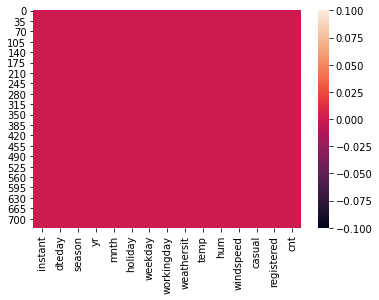

In [3]:
sns.heatmap(bike.isnull());

In [4]:
bike = bike.drop(labels=['instant'], axis = 1)

In [ ]:
bike.head()

In [6]:
bike = bike.drop(labels=['casual', 'registered'], axis = 1)

In [ ]:
bike.dteday = pd.to_datetime(bike.dteday, format='%m/%d/%Y')

In [10]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [11]:
bike = bike.drop(labels=['dteday'], axis = 1)

Text(0, 0.5, 'Bike Rental')

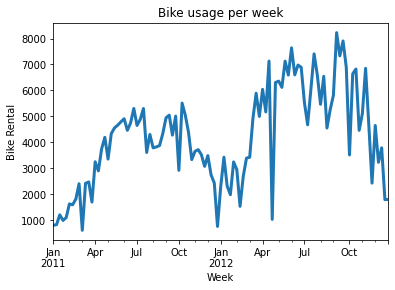

In [13]:
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike Rental')

Text(0, 0.5, 'Bike Rental')

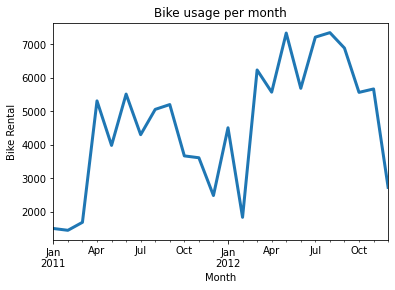

In [14]:
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Bike usage per month')
plt.xlabel('Month')
plt.ylabel('Bike Rental')

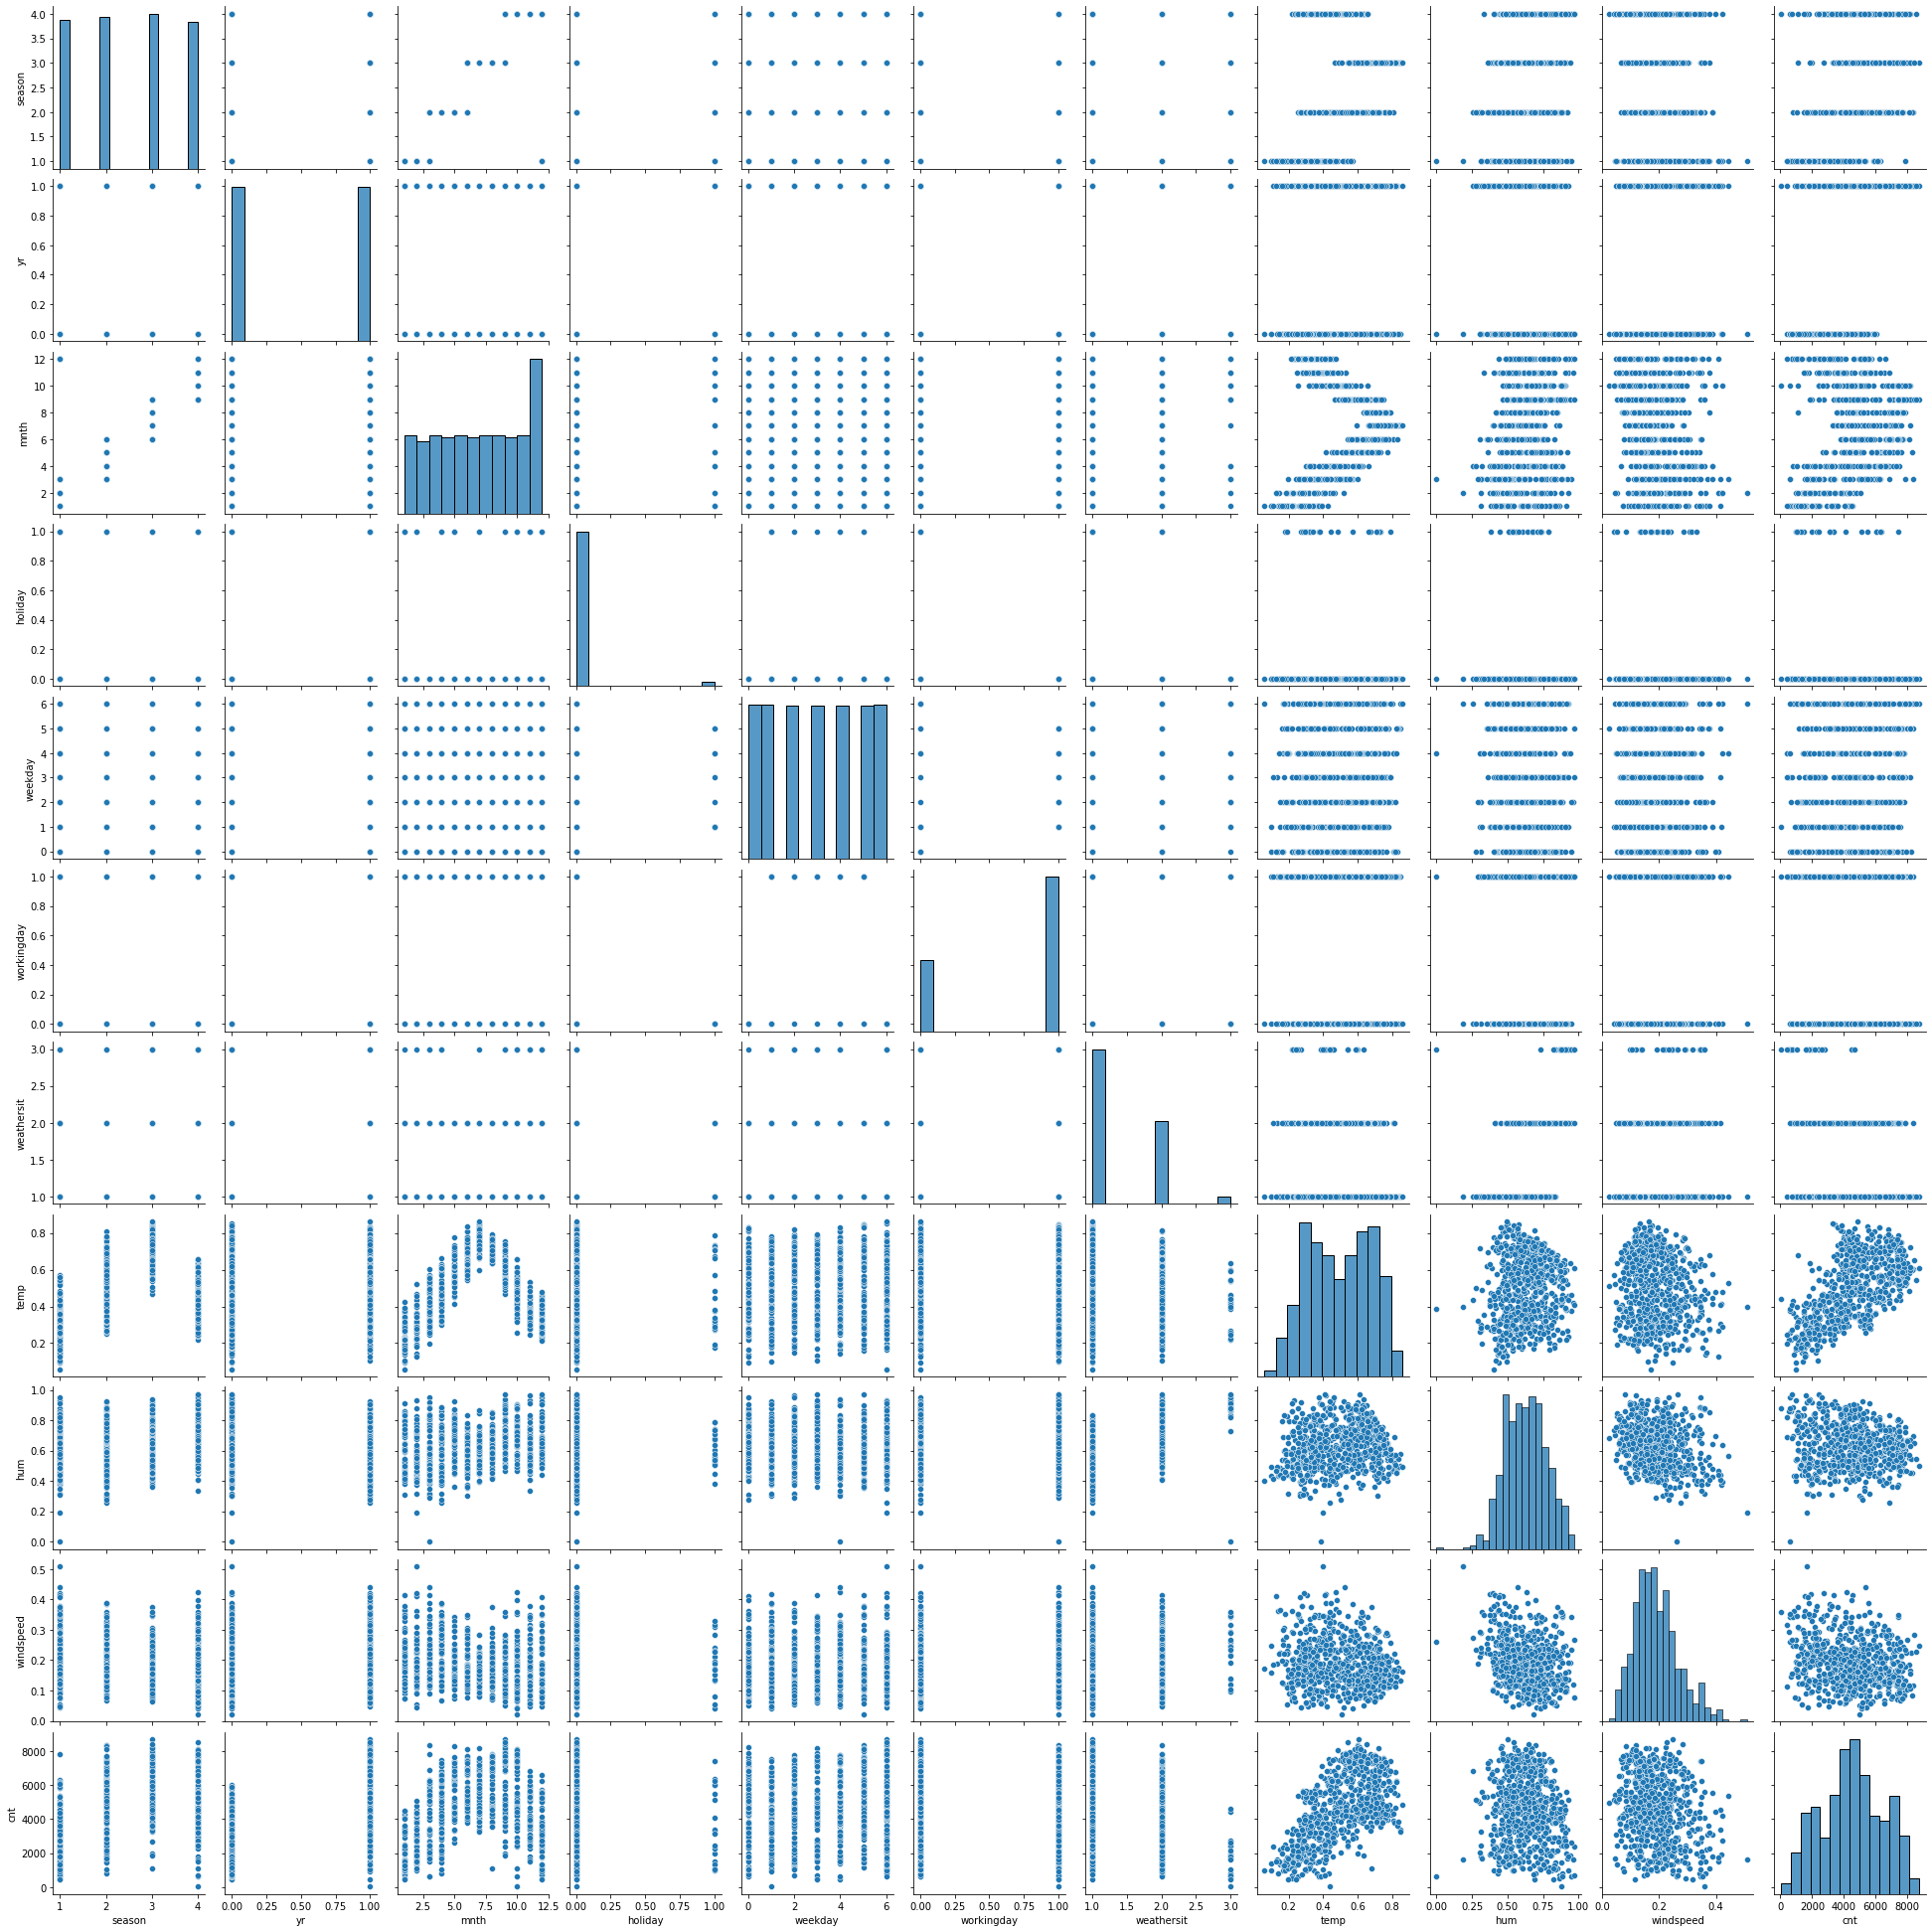

In [15]:
sns.pairplot(bike)

In [16]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]

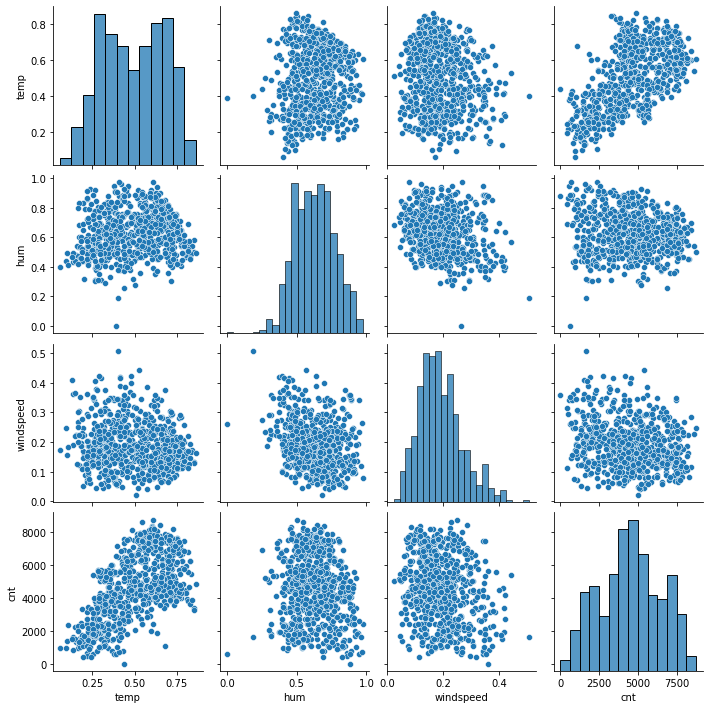

In [17]:
sns.pairplot(X_numerical)

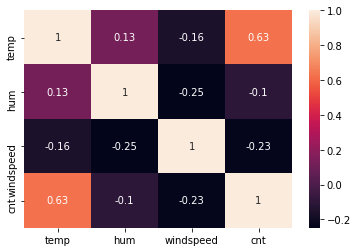

In [18]:
sns.heatmap(X_numerical.corr(), annot= True)

In [ ]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [45]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [46]:
X_cat = pd.DataFrame(X_cat)

In [47]:
X_numerical = X_numerical.reset_index()

In [48]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [49]:
X_all = X_all.drop(labels=['dteday'], axis = 1)

In [50]:
X = X_all.iloc[: , :-1].values #everithing without the result
y = X_all.iloc[:, -1:].values #only the results

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units= 100, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units= 100, activation='relu'))
model.add(tf.keras.layers.Dense(units= 1, activation='linear'))

In [54]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 25, batch_size = 50, validation_split=0.2)